In [1]:
"""Zapoznaj się z danymi dotyczącymi ofiar katastrofy Titanica (które można pobrać z serwisu Kaggle
: https://www.kaggle.com/c/titanic/data). 
W oparciu o artykuł zawarty na stronie: https://stackabuse.com/pandas-library-for-data-visualization-in-python/ 
wykonaj analizę pliku z danymi. Przedstaw dane w postaci tabeli, sporządź histogram wieku ofiar, odpowiedz na pytanie - 
co mogło mieć wpływ na przeżycie pasażerów (płeć, wiek, status społeczny na podstawie klasy biletu). 
Następnie utwórz program z interfejsem konsolowym (CLI) do eksploracji wczytanego pliku w danymi 
(program powinien posiadać instrukcje do wyświetlania wybranych charakterystyk i wartości opisujących wskazany zbiór danych. 
Dodatkowe funkcjonalności programu oraz zaawansowane mechanizmy (funkcje, klasy), sporządzenie opisu/dokumentacji 
zwiększają ocenę za realizację projektu.
"""

'Zapoznaj się z danymi dotyczącymi ofiar katastrofy Titanica (które można pobrać z serwisu Kaggle\n: https://www.kaggle.com/c/titanic/data). \nW oparciu o artykuł zawarty na stronie: https://stackabuse.com/pandas-library-for-data-visualization-in-python/ \nwykonaj analizę pliku z danymi. Przedstaw dane w postaci tabeli, sporządź histogram wieku ofiar, odpowiedz na pytanie - \nco mogło mieć wpływ na przeżycie pasażerów (płeć, wiek, status społeczny na podstawie klasy biletu). \nNastępnie utwórz program z interfejsem konsolowym (CLI) do eksploracji wczytanego pliku w danymi \n(program powinien posiadać instrukcje do wyświetlania wybranych charakterystyk i wartości opisujących wskazany zbiór danych. \nDodatkowe funkcjonalności programu oraz zaawansowane mechanizmy (funkcje, klasy), sporządzenie opisu/dokumentacji \nzwiększają ocenę za realizację projektu.\n'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
#Tu wczytuje dane i łącze w jedną tabelę ponieważ później będę zmieniał sposób zapisania,
###a nie mam zamiaru zmieniać ich w obu tabelach:) 
test = pd.read_csv('test.csv')
test_labels = pd.read_csv('gender_submission.csv')
train = pd.read_csv('train.csv')
test['Survived'] = [x for x in test_labels['Survived']]
passengers = pd.concat([train, test]).reset_index()
passengers  = passengers[['PassengerId','Survived','Pclass','Name','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','Embarked']]
#Przedstaw dane w postaci tabeli
#display(passengers)




In [3]:
#histogram wieku ofiar
def tabela():
    not_survived = passengers[passengers.Survived == 0].reset_index()
    bins = range(0, int(max((not_survived.Age))), 2)
    sns.histplot(data = not_survived, x = 'Age', bins = bins, color = 'lightblue')
    plt.show()
    print(f"Widać że najwięcej ofiar było z wieku 18-30, co jest zrozumiałe patrząc na to że średni wiek pasażerów to {np.mean(passengers.Age)}")

In [4]:
#Zmianiam kolumne Sex na 0/1 po to żeby algorytm miał prościej przeprocesować te daane. Podobna sprawa z tworzeniem nowych kolumn niżej.
passengers['Sex'] = passengers['Sex'].map({"male": "0", "female": "1"})
print(passengers.head())
passengers['FirstClass'] = passengers['Pclass'].apply(lambda x: 1 if x==1 else 0)
#print(passengers.FirstClass)

passengers['SecondClass'] = passengers['Pclass'].apply(lambda x: 1 if x==2 else 0)
#print(passengers.SecondClass)

#Zmianiam wszystkie nan na średnią wieku
passengers['Age'] = passengers['Age'].fillna(passengers.Age.mean())
passengers['Parch'] = passengers['Parch'].fillna(0)
passengers['SibSp'] = passengers['SibSp'].fillna(0)
#print(passengers['Age'].value_counts(dropna = False)) ## do sprawdzenia czy zadziałało



   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris   0  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...   1  38.0      1      0   
2                             Heikkinen, Miss. Laina   1  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)   1  35.0      1      0   
4                           Allen, Mr. William Henry   0  35.0      0      0   

             Ticket     Fare Cabin Embarked  
0         A/5 21171   7.2500   NaN        S  
1          PC 17599  71.2833   C85        C  
2  STON/O2. 3101282   7.9250   NaN        S  
3            113803  53.1000  C123        S  
4            373450   8.0500   NaN        S  


In [11]:
#dziele na cele i dane do ml algorytmu
features = passengers[['Sex','Age','FirstClass', 'SecondClass','Parch','SibSp']]
survival = passengers.Survived
print(features.head())
print(features.Age.count())


  Sex   Age  FirstClass  SecondClass  Parch  SibSp
0   0  22.0           0            0      0      1
1   1  38.0           1            0      0      1
2   1  26.0           0            0      0      0
3   1  35.0           1            0      0      1
4   0  35.0           0            0      0      0
1309


In [6]:
#skalowanie i ml algorytm
train_features, test_features, train_survival, test_survival = train_test_split(features, survival, test_size=0.2, random_state=40)

scaler = StandardScaler()
train_features = scaler.fit_transform(train_features)
test_features = scaler.transform(test_features)

model = LogisticRegression()
model.fit(train_features, train_survival)
#accuracy modelu
print(model.score(test_features, test_survival))

0.8893129770992366


In [7]:
#Jaka dana miała największy wpływ?
wspolczynniki = list(model.coef_[0])
wspol_labels = ['Sex','Age','FirstClass','SecondClass','Parch','SibSp']
wspol_razem = list(zip(['Sex','Age','FirstClass','SecondClass','Parch','SibSp'],model.coef_[0]))
max_wsp = max(wspolczynniki)
max_wsp_index = wspolczynniki.index(max_wsp)
print(max_wsp_index)

0


In [8]:
def predict():
    print("Podaj dane o które zostaniesz poproszony na ekranie.")
    dane = np.array([float(input("Podaj płeć biologiczną(0 = mężczyzna, 1 = kobieta): ")),
                    float(input("Podaj wiek w latach: ")),
                    float(input("Płynąłbyś pierwszą czy drugą klasą(zgadując znając siebie)? 1 - Pierwsza klasa, 0 - Druga klasa: ")),
                    float(input("Ilość dzieci/rodziców płynących razem statkiem z Tobą(zgadując znając siebie):  ")),
                    float(input("Ilość rodzeństwa/małżonków płynących razem statkiem z Tobą(zgadując znając siebie): "))])
    dane = [np.insert(dane,3,0.0) if dane[2] == 1.0 else np.insert(dane,3,1.0)]
    skalowane_dane = scaler.transform(dane)
    proba = model.predict_proba(skalowane_dane)
    proba = str(proba)
    proba = proba.replace('[','').replace(']','').split(' ')
    proba = float(proba[1])
    if model.predict(skalowane_dane) == 1:
        print(f"Wooow! Przeżyjesz i masz na to {proba*100}%!")
    else:
        print(f"Szanse nie są po Twojej stronie aczkolwiek dalej masz szansę, która wynosi aż {proba*100}%!")
        



1.Wyświetl zbiór danych.
2.Wyświetl histogram wieku ofiar.
3.Wyświetl co miało największy wpływ na to kto przeżył i jego wartość współczynnika.
4.Wyświetl wszystkie współczynniki użyte wraz z wartościami.
5.Wprowadź swoje dane i sprawdź czy przeżyłbyś na titanicu.
6.Zakończ działanie programu.
2


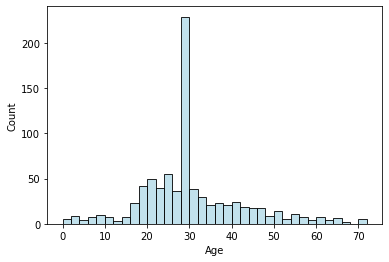

Widać że najwięcej ofiar było z wieku 18-30, co jest zrozumiałe patrząc na to że średni wiek pasażerów to 29.881137667303985


1.Wyświetl zbiór danych.
2.Wyświetl histogram wieku ofiar.
3.Wyświetl co miało największy wpływ na to kto przeżył i jego wartość współczynnika.
4.Wyświetl wszystkie współczynniki użyte wraz z wartościami.
5.Wprowadź swoje dane i sprawdź czy przeżyłbyś na titanicu.
6.Zakończ działanie programu.
2


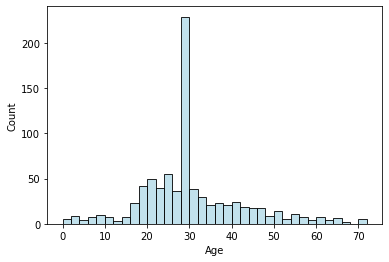

Widać że najwięcej ofiar było z wieku 18-30, co jest zrozumiałe patrząc na to że średni wiek pasażerów to 29.881137667303985


1.Wyświetl zbiór danych.
2.Wyświetl histogram wieku ofiar.
3.Wyświetl co miało największy wpływ na to kto przeżył i jego wartość współczynnika.
4.Wyświetl wszystkie współczynniki użyte wraz z wartościami.
5.Wprowadź swoje dane i sprawdź czy przeżyłbyś na titanicu.
6.Zakończ działanie programu.
2


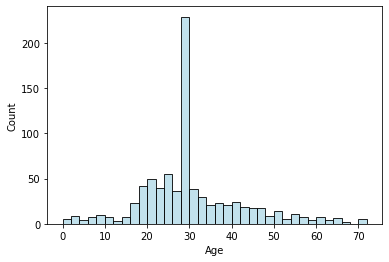

Widać że najwięcej ofiar było z wieku 18-30, co jest zrozumiałe patrząc na to że średni wiek pasażerów to 29.881137667303985


1.Wyświetl zbiór danych.
2.Wyświetl histogram wieku ofiar.
3.Wyświetl co miało największy wpływ na to kto przeżył i jego wartość współczynnika.
4.Wyświetl wszystkie współczynniki użyte wraz z wartościami.
5.Wprowadź swoje dane i sprawdź czy przeżyłbyś na titanicu.
6.Zakończ działanie programu.
2


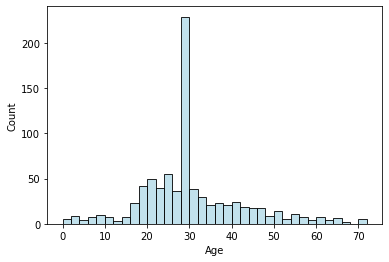

Widać że najwięcej ofiar było z wieku 18-30, co jest zrozumiałe patrząc na to że średni wiek pasażerów to 29.881137667303985


1.Wyświetl zbiór danych.
2.Wyświetl histogram wieku ofiar.
3.Wyświetl co miało największy wpływ na to kto przeżył i jego wartość współczynnika.
4.Wyświetl wszystkie współczynniki użyte wraz z wartościami.
5.Wprowadź swoje dane i sprawdź czy przeżyłbyś na titanicu.
6.Zakończ działanie programu.
2


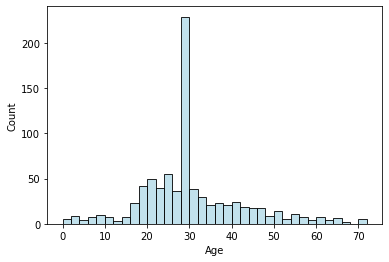

Widać że najwięcej ofiar było z wieku 18-30, co jest zrozumiałe patrząc na to że średni wiek pasażerów to 29.881137667303985


1.Wyświetl zbiór danych.
2.Wyświetl histogram wieku ofiar.
3.Wyświetl co miało największy wpływ na to kto przeżył i jego wartość współczynnika.
4.Wyświetl wszystkie współczynniki użyte wraz z wartościami.
5.Wprowadź swoje dane i sprawdź czy przeżyłbyś na titanicu.
6.Zakończ działanie programu.
6
Dziękuję za skorzystanie z programu!
Praca wykonana przez Oskara Tutaj :)


In [9]:
while True:
    print("\n")
    print(f"""1.Wyświetl zbiór danych.
2.Wyświetl histogram wieku ofiar.
3.Wyświetl co miało największy wpływ na to kto przeżył i jego wartość współczynnika.
4.Wyświetl wszystkie współczynniki użyte wraz z wartościami.
5.Wprowadź swoje dane i sprawdź czy przeżyłbyś na titanicu.
6.Zakończ działanie programu.""")
    x = int(input())
    if x == 1:
        display(passengers)
    elif x ==2:
        tabela()
    elif x ==3:
        print(f"Największy wpływ miał współczynnik {wspol_labels[max_wsp_index]} o wartości {max_wsp}")
        print("Moją hipotęzą dlaczego tak jest to że zawsze dzieci i kobiety pierwszeństwo mają w takich katastrofach co by się zgadzało z tym że kobiety mają średnio dużo większe szanse.")
    elif x ==4:
        print(wspol_razem)
    elif x ==5:
        predict()
    elif x ==6:
        print("Dziękuję za skorzystanie z programu!\nPraca wykonana przez Oskara Tutaj :)")
        break
        